# TP &mdash; Restricted Boltzmann Machines

**Auteurs:**

* Javier Andres Boada Martinez
* Kevin Alexandro Sanchez Diaz
* Yevhenii Sielskyi

## Chargement de données

In [1]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

alphadigits = scipy.io.loadmat('data/binaryalphadigs.mat')

## Analyse Exploratoire des Données 

In [2]:
# 10 digits and 26 handwritten letters (A-Z),
# 39 examples of each class: 
print(f"There are {alphadigits['dat'].shape[0]} different character classes, "
      f"{alphadigits['dat'].shape[1]} examples each.")

There are 36 different character classes, 39 examples each.


In [3]:
# The dimensions of each image:
print(f"The size of each binary image is: {alphadigits['dat'][0, 0].shape}")

The size of each binary image is: (20, 16)


Training data examples:

Class 0:


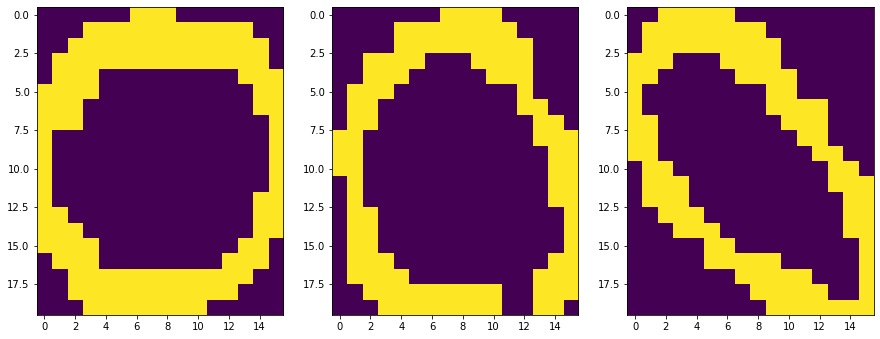


Class 0:


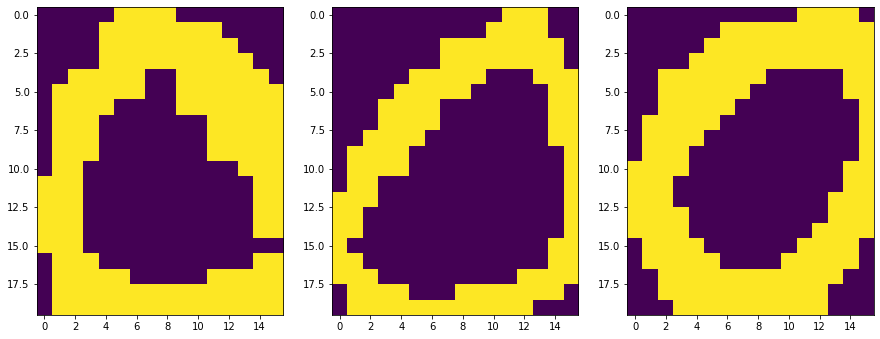


Class 18:


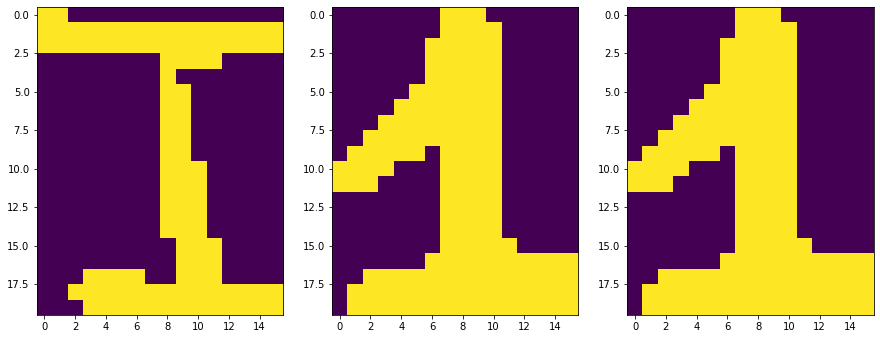


Class 23:


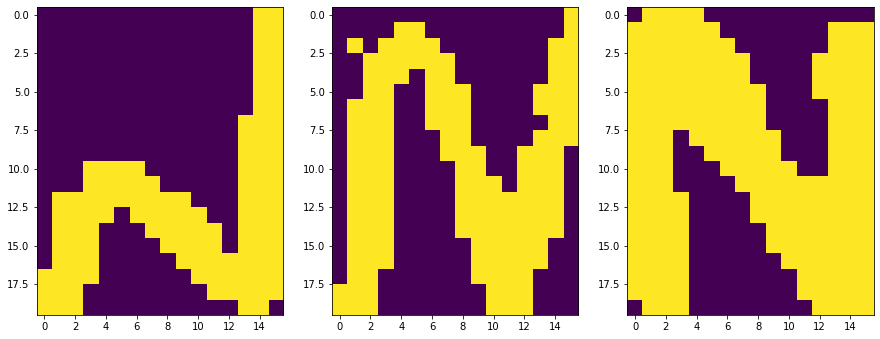


Class 23:


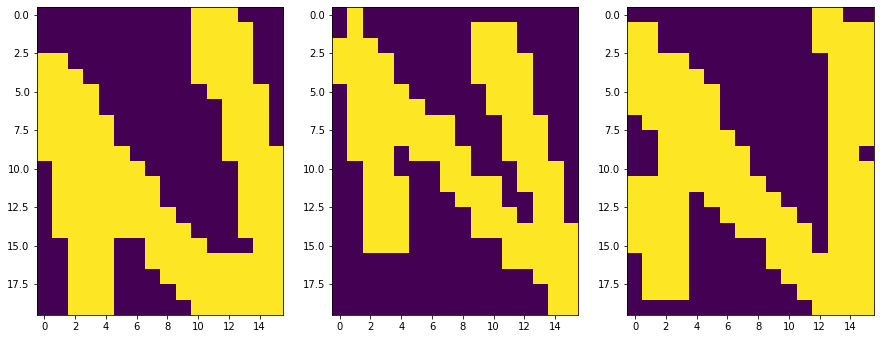

In [4]:
# Number of random classes to output:
nb_classes_to_show = 5
# Examples per class to show:
nb_samples_per_class = 3

# Images to show in one row:
nb_imgs_per_row = 3
# Number of rows:
nb_rows = nb_samples_per_class // nb_imgs_per_row + 1 \
            if nb_samples_per_class % nb_imgs_per_row \
            else nb_samples_per_class // nb_imgs_per_row

# Randomly choose some classes (their indices):
class_indices = np.sort(np.random.choice(
    range(alphadigits['dat'].shape[0]),
    size=nb_classes_to_show
))

# Output some original images:
print("Training data examples:")
for class_index in class_indices:
    print(f"\nClass {class_index}:")

    # Choose random samples:
    example_indices = np.random.choice(
        range(alphadigits['dat'].shape[1]),
        size=nb_samples_per_class
    )

    # Output chosen class images:
    plt.figure(figsize=(5 * nb_imgs_per_row, 6 * nb_rows))
    for i, image in enumerate(alphadigits['dat'][class_index, example_indices], 1):
        plt.subplot(nb_rows, nb_imgs_per_row, i)
        plt.imshow(image)
    plt.show()

## Échantillonnage des données

In [5]:
from utils import read_alpha_digits

In [6]:
# Character classes to learn:
train_classes = [10, 11]

In [7]:
dataset = read_alpha_digits(alphadigits['dat'], train_classes)

In [8]:
dataset.shape

(78, 320)

## Entraînement

In [6]:
from rbm import RBM

In [10]:
# Hyperparameters:
HIDDEN_UNITS = 200
LEARNING_RATE = 1E-2

EPOCHS = 500
BATCH_SIZE = 10

In [13]:
rbm = RBM(dataset.shape[-1], HIDDEN_UNITS)

In [12]:
rbm.train(dataset, lr=LEARNING_RATE, epochs=EPOCHS, batch_size=BATCH_SIZE)

 0.12695
Epoch average MSE: 0.13724

Epoch 284:
Batch 8: [====================>]. Batch MSE: 0.11992
Epoch average MSE: 0.13062

Epoch 285:
Batch 8: [====================>]. Batch MSE: 0.15000
Epoch average MSE: 0.13684

Epoch 286:
Batch 8: [====================>]. Batch MSE: 0.14648
Epoch average MSE: 0.13351

Epoch 287:
Batch 8: [====================>]. Batch MSE: 0.13047
Epoch average MSE: 0.13299

Epoch 288:
Batch 8: [====================>]. Batch MSE: 0.12070
Epoch average MSE: 0.13204

Epoch 289:
Batch 8: [====================>]. Batch MSE: 0.12891
Epoch average MSE: 0.13291

Epoch 290:
Batch 8: [====================>]. Batch MSE: 0.13789
Epoch average MSE: 0.13302

Epoch 291:
Batch 8: [====================>]. Batch MSE: 0.12891
Epoch average MSE: 0.13432

Epoch 292:
Batch 8: [====================>]. Batch MSE: 0.14219
Epoch average MSE: 0.13074

Epoch 293:
Batch 8: [====================>]. Batch MSE: 0.13047
Epoch average MSE: 0.13014

Epoch 294:
Batch 8: [====================>]

## Génération des images

In [7]:
# Image generation parameters:
ITER_GIBBS = 100
NB_IMAGES = 5

In [14]:
test_images = rbm.generate_images(iter_gibbs=ITER_GIBBS, nb_images=NB_IMAGES)

Generated images:


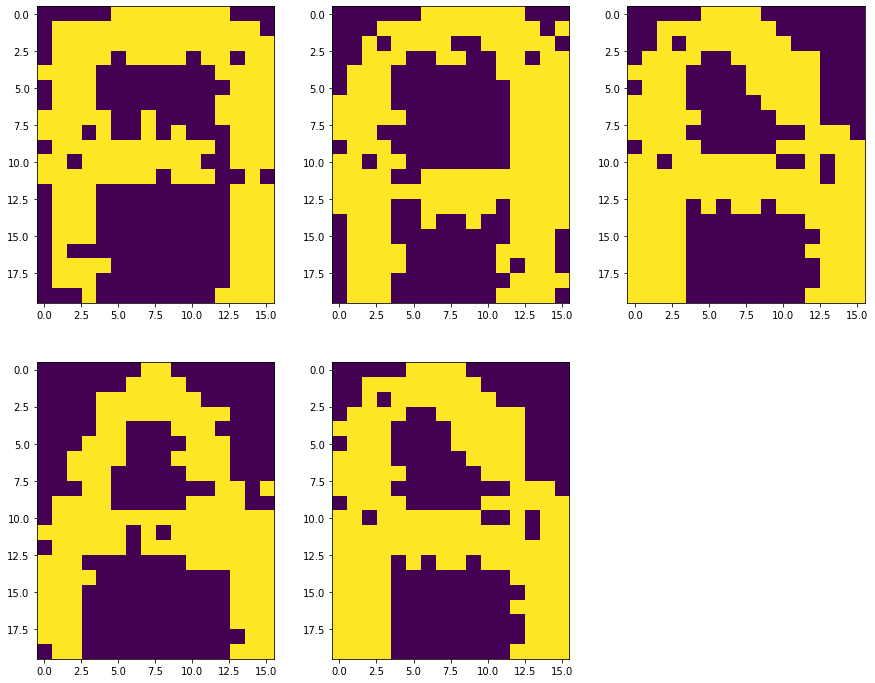

In [15]:
# Number of rows:
nb_rows = NB_IMAGES // nb_imgs_per_row + 1 \
            if NB_IMAGES % nb_imgs_per_row \
            else NB_IMAGES // nb_imgs_per_row

# Output generated images:
print("Generated images:")
plt.figure(figsize=(5 * nb_imgs_per_row, 6 * nb_rows))
for i, image in enumerate(test_images, 1):
    plt.subplot(nb_rows, nb_imgs_per_row, i)
    plt.imshow(image)
plt.show()

## Expériences

In [8]:
from utils import plot_avg_mse, generate_image_per_rbm

In [10]:
train_classes = [10, 11]
dataset = read_alpha_digits(alphadigits['dat'], train_classes)

### Model Hyperparameters

In [9]:
# Hyperparameters:
HIDDEN_UNITS = 500
LEARNING_RATE = 1E-2

EPOCHS = 500
BATCH_SIZE = 10

In [11]:
model_avg_mse = []
rbms = []
hidden_units = [100, 200, 500, 1000]

for h_units in hidden_units:
    rbms += [RBM(dataset.shape[-1], h_units)]
    avg_mse = rbms[-1].train(dataset, lr=LEARNING_RATE, epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, return_avg_mse=True, verbose=0)
    model_avg_mse += [avg_mse]

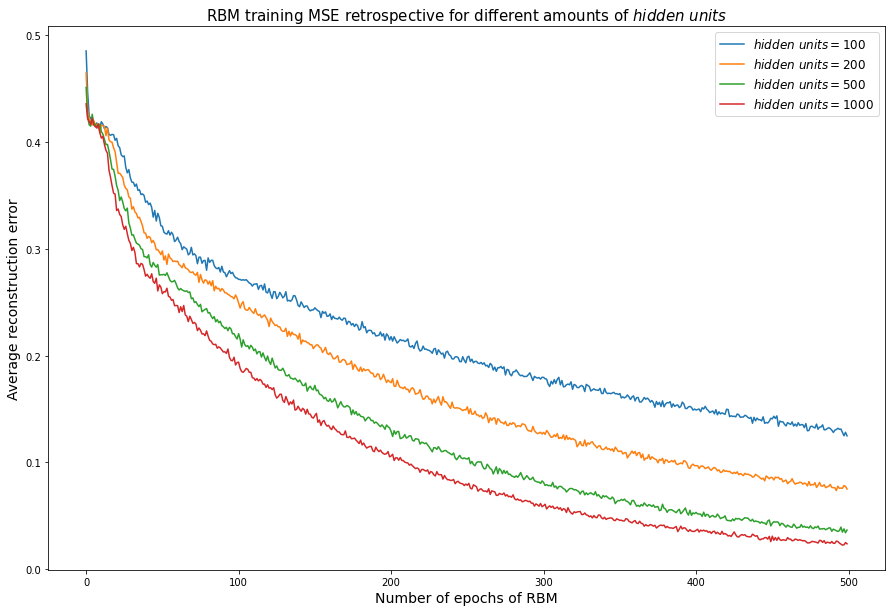

In [12]:
plot_avg_mse(model_avg_mse, "hidden\ units", hidden_units)

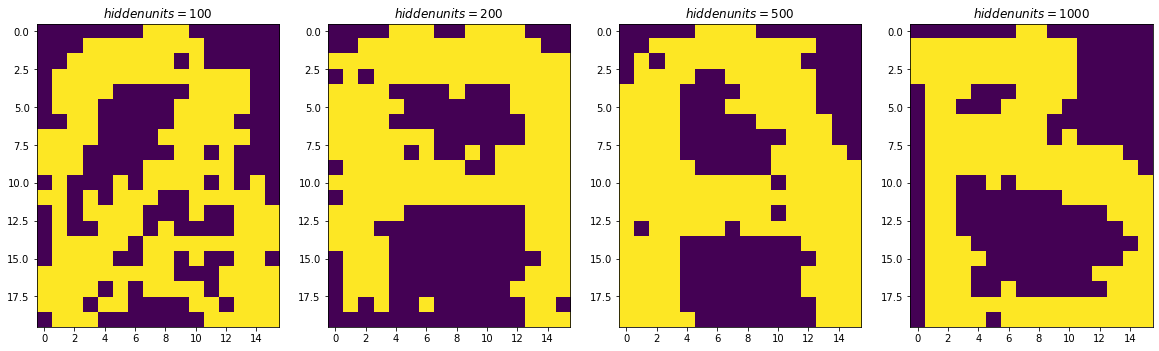

In [13]:
generate_image_per_rbm(rbms, 'hidden\ units', hidden_units, iter_gibbs=ITER_GIBBS)

In [17]:
model_avg_mse = []
rbms = []
sigmas2 = [.01, .05, 0.1, 10]

for sigma2 in sigmas2:
    rbms += [RBM(dataset.shape[-1], HIDDEN_UNITS, sigma2=sigma2)]
    avg_mse = rbms[-1].train(dataset, lr=LEARNING_RATE, epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, return_avg_mse=True, verbose=0)
    model_avg_mse += [avg_mse]

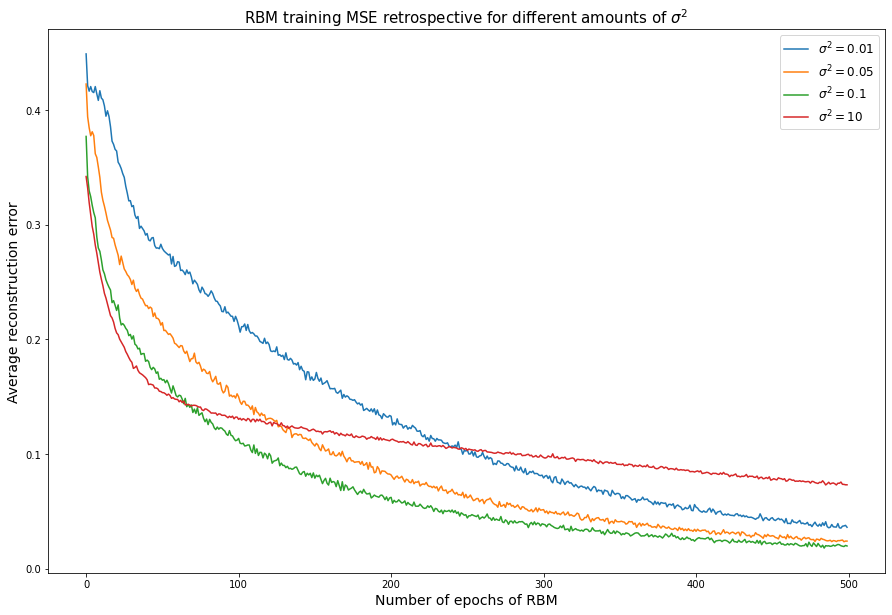

In [18]:
plot_avg_mse(model_avg_mse, "\sigma^2", sigmas2)

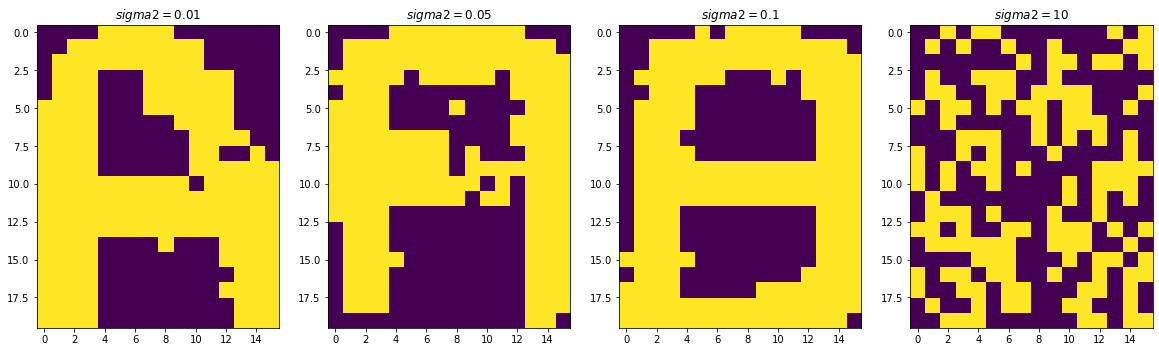

In [19]:
generate_image_per_rbm(rbms, '\sigma^2', sigmas2, iter_gibbs=ITER_GIBBS)

### Training Hyperparameters

In [35]:
# Hyperparameters:
HIDDEN_UNITS = 500
SIGMA2 = 0.1
LEARNING_RATE = 5E-2

EPOCHS = 500
BATCH_SIZE = 10

In [29]:
model_avg_mse = []
rbms = []
learning_rates = [.001, .01, .05, .1]

for lr in learning_rates:
    rbms += [RBM(dataset.shape[-1], HIDDEN_UNITS, sigma2=SIGMA2)]
    avg_mse = rbms[-1].train(dataset, lr=lr, epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, return_avg_mse=True, verbose=0)
    model_avg_mse += [avg_mse]

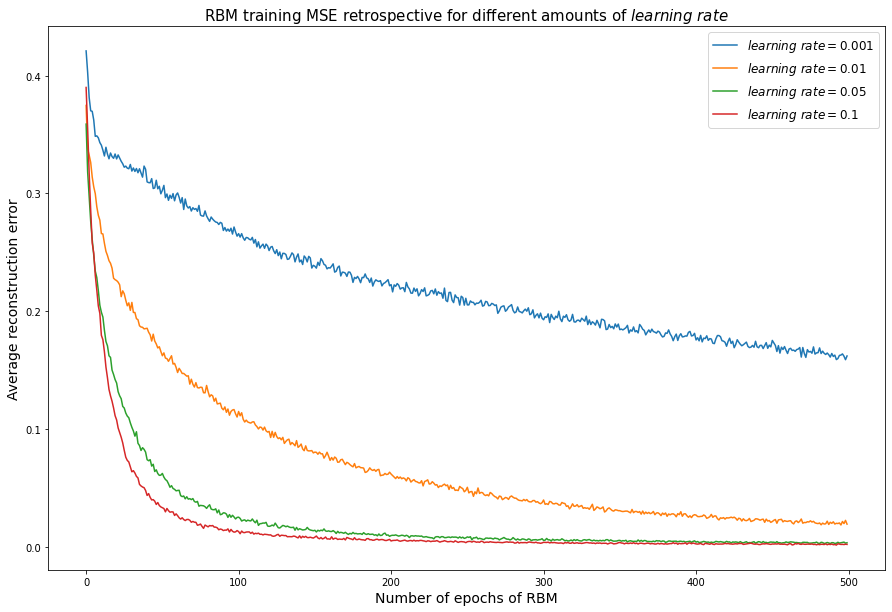

In [30]:
plot_avg_mse(model_avg_mse, "learning\ rate", learning_rates)

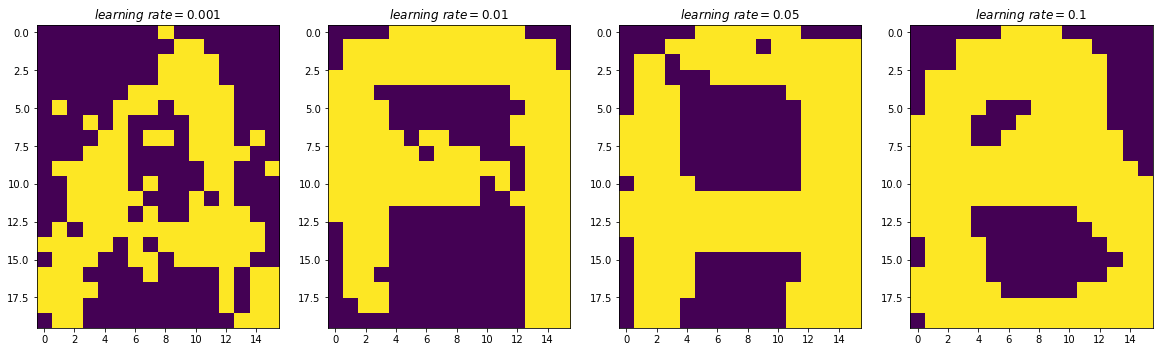

In [34]:
generate_image_per_rbm(rbms, 'learning\ rate', learning_rates, iter_gibbs=ITER_GIBBS)

In [36]:
model_avg_mse = []
rbms = []
batch_sizes = [1, 5, 10, 100]

for batch_size in batch_sizes:
    rbms += [RBM(dataset.shape[-1], HIDDEN_UNITS, sigma2=SIGMA2)]
    avg_mse = rbms[-1].train(dataset, lr=LEARNING_RATE, epochs=EPOCHS, 
                    batch_size=batch_size, return_avg_mse=True, verbose=0)
    model_avg_mse += [avg_mse]

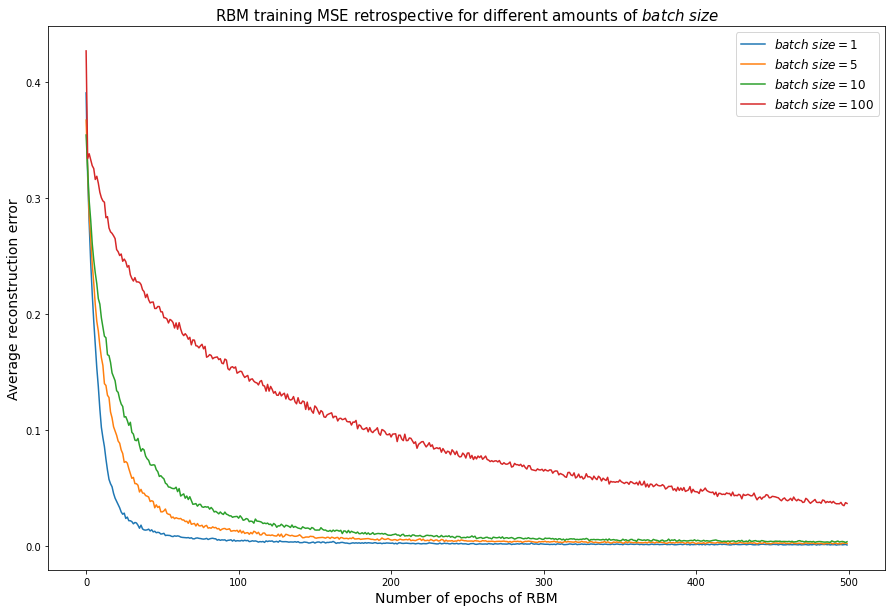

In [37]:
plot_avg_mse(model_avg_mse, "batch\ size", batch_sizes)

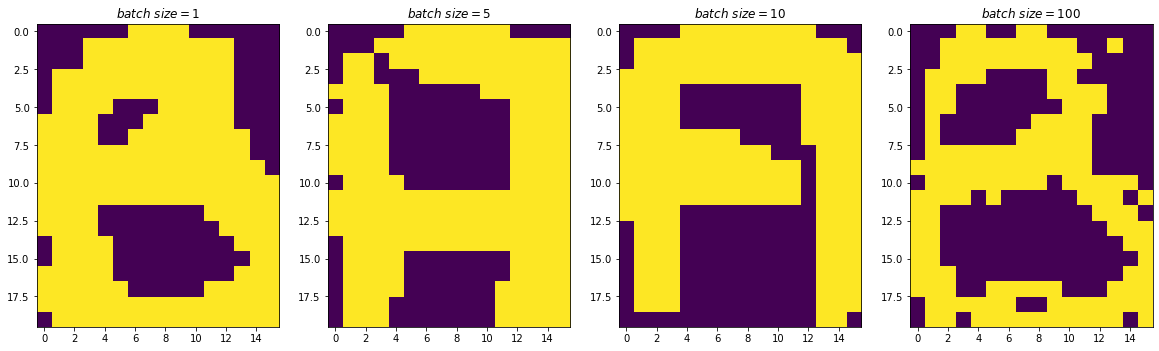

In [38]:
generate_image_per_rbm(rbms, 'batch\ size', batch_sizes, iter_gibbs=ITER_GIBBS)

## MNIST

In [16]:
# load MNIST data - handwritten digits:
mnist = scipy.io.loadmat('data/mnist_all.mat')

# MNIST image size:
mnist_img_size = (28, 28)

In [17]:
# Merge training and test data for each class:
for class_index in range(10):
    mnist['train' + str(class_index)] = np.concatenate(
        (mnist['train' + str(class_index)],
        mnist['test' + str(class_index)]), axis=0
    )

In [18]:
# Character classes to learn:
train_classes = [5]

# Create a MNIST training dataset:
mnist_dataset = np.concatenate(
    [mnist['train' + str(class_index)] for class_index in train_classes],
    axis=0
)

# Binarise data:
mnist_dataset = np.where(mnist_dataset > 0, 1, 0)

In [19]:
# Create another RBM:
mnist_rbm = RBM(mnist_dataset.shape[-1], HIDDEN_UNITS)

# Train RBM on the MNIST data:
mnist_rbm.train(
    mnist_dataset, lr=LEARNING_RATE,
    epochs=EPOCHS, batch_size=BATCH_SIZE * 10
)

Epoch 1:
Batch 64: [====================>]. Batch MSE: 0.20869
Epoch average MSE: 0.23713

Epoch 2:
Batch 64: [====================>]. Batch MSE: 0.18053
Epoch average MSE: 0.18683

Epoch 3:
Batch 64: [====================>]. Batch MSE: 0.17690
Epoch average MSE: 0.16402

Epoch 4:
Batch 64: [====================>]. Batch MSE: 0.13854
Epoch average MSE: 0.15473

Epoch 5:
Batch 64: [====================>]. Batch MSE: 0.12843
Epoch average MSE: 0.14860

Epoch 6:
Batch 64: [====================>]. Batch MSE: 0.14384
Epoch average MSE: 0.14174

Epoch 7:
Batch 64: [====================>]. Batch MSE: 0.14413
Epoch average MSE: 0.13581

Epoch 8:
Batch 64: [====================>]. Batch MSE: 0.13962
Epoch average MSE: 0.13189

Epoch 9:
Batch 64: [====================>]. Batch MSE: 0.12755
Epoch average MSE: 0.12868

Epoch 10:
Batch 64: [====================>]. Batch MSE: 0.12539
Epoch average MSE: 0.12622

Epoch 11:
Batch 64: [====================>]. Batch MSE: 0.12245
Epoch average MSE: 0.1245

In [20]:
test_images = mnist_rbm.generate_images(
    iter_gibbs=ITER_GIBBS * 5,
    nb_images=NB_IMAGES,
    img_size=mnist_img_size    
)

Generated images:


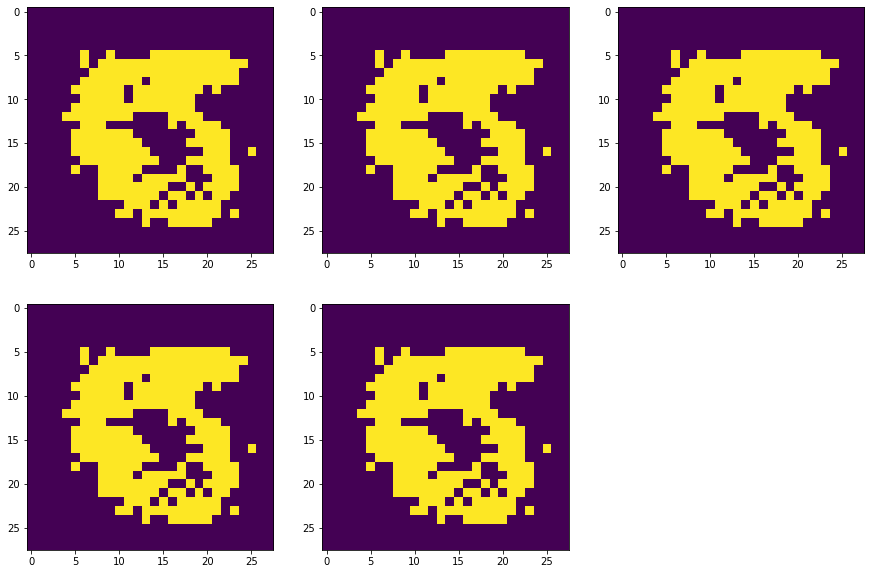

In [21]:
# Number of rows:
nb_rows = NB_IMAGES // nb_imgs_per_row + 1 \
            if NB_IMAGES % nb_imgs_per_row \
            else NB_IMAGES // nb_imgs_per_row

# Output generated images:
print("Generated images:")
plt.figure(figsize=(5 * nb_imgs_per_row, 5 * nb_rows))
for i, image in enumerate(test_images, 1):
    plt.subplot(nb_rows, nb_imgs_per_row, i)
    plt.imshow(image)
plt.show()

## USPS

In [22]:
# load USPS data - handwritten digits:
usps = scipy.io.loadmat('data/usps_all.mat')

# USPS image size:
usps_img_size = (16, 16)

In [23]:
# Character classes to learn:
train_classes = [5]

usps_dataset = np.concatenate(
    [usps['data'][:, :, class_index].T for class_index in train_classes],
    axis=0
)

# Binarise data:
usps_dataset = np.where(usps_dataset > 0, 1, 0)

Training data examples:

Class 5:


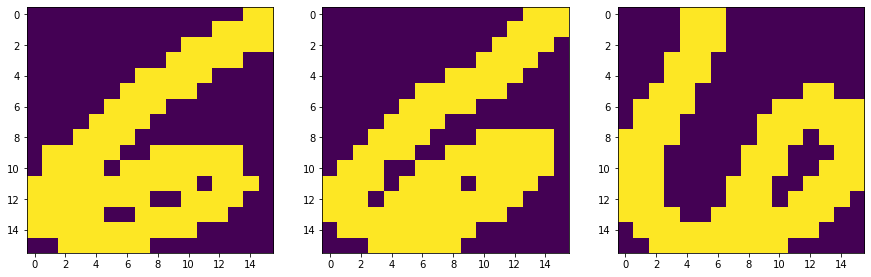

In [30]:
# Number of rows:
nb_rows = nb_samples_per_class // nb_imgs_per_row + 1 \
            if nb_samples_per_class % nb_imgs_per_row \
            else nb_samples_per_class // nb_imgs_per_row

# Output some original images:
print("Training data examples:")
for class_index in train_classes:
    print(f"\nClass {class_index}:")

    # Choose random samples:
    example_indices = np.random.choice(
        range(usps_dataset.shape[0]),
        size=nb_samples_per_class
    )

    # Output chosen class images:
    plt.figure(figsize=(5 * nb_imgs_per_row, 5 * nb_rows))
    for i, image in enumerate(usps_dataset[example_indices], 1):
        plt.subplot(nb_rows, nb_imgs_per_row, i)
        plt.imshow(image.reshape(usps_img_size).T)
    plt.show()

In [24]:
# Hyperparameters:
HIDDEN_UNITS = 500
LEARNING_RATE = 1E-1

EPOCHS = 600
BATCH_SIZE = 10

In [25]:
# Create another RBM:
usps_rbm = RBM(usps_dataset.shape[-1], HIDDEN_UNITS)

# Train RBM on the USPS data:
usps_rbm.train(
    usps_dataset, lr=LEARNING_RATE,
    epochs=EPOCHS, batch_size=BATCH_SIZE
)

Epoch 1:
Batch 110: [====================>]. Batch MSE: 0.20312
Epoch average MSE: 0.28508

Epoch 2:
Batch 110: [====================>]. Batch MSE: 0.18828
Epoch average MSE: 0.20598

Epoch 3:
Batch 110: [====================>]. Batch MSE: 0.20508
Epoch average MSE: 0.17580

Epoch 4:
Batch 110: [====================>]. Batch MSE: 0.13242
Epoch average MSE: 0.15594

Epoch 5:
Batch 110: [====================>]. Batch MSE: 0.12695
Epoch average MSE: 0.14272

Epoch 6:
Batch 110: [====================>]. Batch MSE: 0.13086
Epoch average MSE: 0.13307

Epoch 7:
Batch 110: [====================>]. Batch MSE: 0.11758
Epoch average MSE: 0.12289

Epoch 8:
Batch 110: [====================>]. Batch MSE: 0.11758
Epoch average MSE: 0.11743

Epoch 9:
Batch 110: [====================>]. Batch MSE: 0.11094
Epoch average MSE: 0.11070

Epoch 10:
Batch 110: [====================>]. Batch MSE: 0.09375
Epoch average MSE: 0.10696

Epoch 11:
Batch 110: [====================>]. Batch MSE: 0.09219
Epoch average 

In [26]:
# Image generation parameters:
ITER_GIBBS = 100
NB_IMAGES = 5

In [27]:
test_images = usps_rbm.generate_images(
    iter_gibbs=ITER_GIBBS,
    nb_images=NB_IMAGES,
    img_size=usps_img_size
)

Generated images:


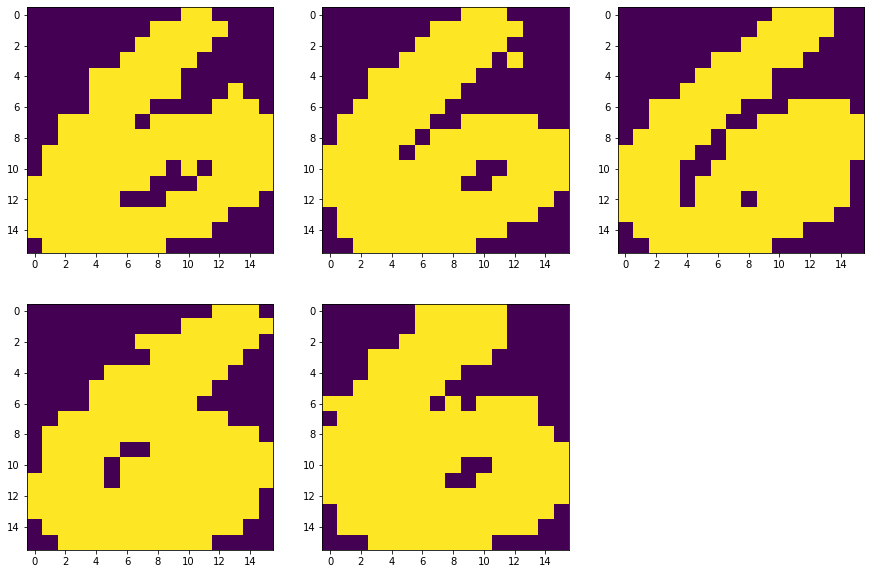

In [28]:
# Number of rows:
nb_rows = NB_IMAGES // nb_imgs_per_row + 1 \
            if NB_IMAGES % nb_imgs_per_row \
            else NB_IMAGES // nb_imgs_per_row

# Output generated images:
print("Generated images:")
plt.figure(figsize=(5 * nb_imgs_per_row, 5 * nb_rows))
for i, image in enumerate(test_images, 1):
    plt.subplot(nb_rows, nb_imgs_per_row, i)
    plt.imshow(image.T)
plt.show()

### USPS (*U*nited *S*tates *P*ostal *S*ervice) sommaire

**USPS expériences ont été effectuées sur une seule classe &mdash; chiffre $6$**

> Cette fois-ci, nous traitons les images les plus petites: chaque chiffre est de taille $16 \times 16$, soient $256$ pixels. L'entraînement se passe par conséquent plus rapidement. Néanmoins, le nombre d'exemples par classe est égal à $1100$, ce qui est beaucoup plus grand que dans le cadre de *alpha digits*. En revanche, cette base de données est moins volumineuse que *MNIST*.

> Nous allons donc procéder à l'apprentissage avec un nombre important d'unités cachées $q =$`HIDDEN_UNITS = 500`. Le nombre d'époques étant aussi assez grand (`EPOCHS = 600`), la taille de chaque *batch* vaut cependant $10$ (`BATCH_SIZE = 10`), soient $110$ *batches* par époque, ce qui nous permet d'effectuer des mises à jour plus fréquentes de poids afin d'obtenir plus de précision (l'erreur moyenne moindre). Le taux d'apprentissage (*learning rate*) est réglé à `lr = `$\epsilon = 10^{-1}$ définissant les pas considérables vers la direction inverse du gradient de la fonction de coût lors de chaque mise à jour.

> Une telle configuration nous amène à l'erreur quadratique moyenne (*M*ean *S*quared *E*rror) $MSE \approx 10^{-3}$ au bout de la dernière, $600$ème époque. Les images ci-dessus représentent $5$ chiffres générés par le *RBM*, appris sur *USPS*. Il est évident de premier regard que les caractères générés sont considérablement plus gras que les échantillons d'apprentissage. En plus, cette épaisseur accrue n'est pas uniformément distribuée tout au long du chiffre. Ceci est dû au fait d'avoir tant d'unités cachées: plus la RBM a de `HIDDEN_UNITS` &mdash; plus de pixels *noirs* (jaunes sur les images &mdash; classe positive) seront restaurés afin d'assurer la présence des pixels noirs dans l'image reconstruite aux mêmes endroits que dans les images d'entraînement. En revanche, certains pixels noirs restaurés sont redondants, ce qui peut aboutir aux résultats flous: par exemple, notre RBM a appris à *écrire* $6$ avec un cercle intérieur presque imperceptible. Nous pouvons également apercevoir quelques pixels noirs isolés (sans voisinage direct), générés par notre machine &mdash; un tel comportement est non naturel pour la main humaine, sauf lors de l'écriture avec de l'encre liquide et une plume.

> Notons, que selon la structure de *USPS dataset*, toutes les images sont initialement aplaties (comme dans le cas de *MNIST*) et transposées. Afin d'éviter plusieurs transformations, les données étaient utilisées comme telles; ensuite, les résultats générés sont également transposés. Dans tous les cas, cette méthode n'affecte aucunement la performance de la Machine de Boltzmann Restreinte.

## RBMs vs GANs

> Dans le cadre de Réseaux Adverses Génératifs (*GAN*s &mdash; *G*enerative *A*dversarial *N*etworks), on entraîne deux réseaux de neurones en parallèle: le premier &mdash; *générateur* &mdash; essaie de reconstruire des images les plus réalistes possible, tandis que le deuxième a pour le but la classification binaire des images d'entrée: réelle ou générée. À la base, tous les deux sont des *DNN*s (*D*eep *N*eural *N*etworks) qui se composent de plusieurs couches cachées. Le nombre de poids d'un *GAN* est donc incomparablement plus grand que celui d'une *RBM*. Par conséquent, l'apprentissage d'un *GAN* exige beaucoup plus de données pour ses deux composantes.

> Les Machines de Boltzmann Restreintes sont plus simples et le besoin des puissances du calcul, de la mémoire, du temps d'entraînement est considérablement moindre. Mais les résultats sont aussi moins impressionnants: les RBMs peuvent être bien appliquées aux tâches de la génération des caractères manuscrits de résolution basse. Il serait plus pertinent de séparer l'entraînement de chaque *RBM*, spécialisée sur un caractère donné pour n'en pas mélanger plusieurs (comme ceci est démontré lors des expériences avec *alphadigits*) et construire un alphabet de qualité. À leur tour, les *GAN*s ont déjà prouvé la capabilité de générer des images complexes (visages humains, animaux etc.) de résolution haute, qui sont indiscernables des exemples réels par l'oeil humain.

## Annexe: code de la *RBM*:

> Nous avons implémenté notre version de *RBM* dans le script `rbm.py` dont le contenu est présenté ci-dessous:

```python
import numpy as np
from IPython.display import clear_output


def sigmoid(X):
    return 1 / (1 + np.exp(-X))


PROGRESS_BAR_LENGTH = 20


class RBM:
    def __init__(self, p, q, sigma2=.01):
        self.p = p
        self.q = q

        self.W = sigma2 * np.random.randn(self.p, self.q)
        self.a = np.zeros([1, self.p])
        self.b = np.zeros([1, self.q])

    def train(self, X, lr, epochs, batch_size, verbose=0):
        nb_samples = X.shape[0]
        X_ = X.copy()

        # List of epochs' statistics to output:
        epoch_progress = []

        for epoch in range(1, epochs + 1):
            # Initialize the current epoch statistics:
            epoch_progress.append("")

            epoch_mse = 0

            # Shuffle data:
            np.random.shuffle(X_)
            
            for batch in range(0, nb_samples, batch_size):
                # Choose a batch:
                X_batch = X_[batch:min(batch + batch_size, nb_samples)]
                cur_batch_size = X_batch.shape[0]

                # Step 0:
                v0 = X_batch
                p_h0 = sigmoid(v0 @ self.W + self.b)
                h0 = (np.random.random([cur_batch_size, self.q]) < p_h0).astype(int)

                # Step 1:
                p_v1 = sigmoid(h0 @ self.W.T + self.a)
                v1 = (np.random.random([cur_batch_size, self.p]) < p_v1).astype(int)
                p_h1 = sigmoid(v1 @ self.W + self.b)

                # Compute the MSE:
                mse = ((v1 - X_batch) ** 2).mean()
                epoch_mse += mse

                # Compute the current batch and current epoch statistics:
                batch_number = batch // batch_size + 1
                samples_treated = (batch + batch_size) // nb_samples
                current_progress = int(PROGRESS_BAR_LENGTH * samples_treated)
                progress_bar = "[" + "=" * current_progress + ">" + "-" * (PROGRESS_BAR_LENGTH - current_progress) + "]"
                
                epoch_progress[-1] = f"Epoch {epoch}:\n" + \
                    f"Batch {batch_number}: {progress_bar}. Batch MSE: {mse:.5f}\n"

                # Output the current batch and current epoch statistics:
                if verbose:
                    clear_output(wait=True)
                    print("\n\n".join(epoch_progress), flush=True)

                # Calculate derivatives:
                da = (v0 - v1).sum(axis=0)
                db = (p_h0 - p_h1).sum(axis=0)
                dW = X_batch.T @ p_h0 - v1.T @ p_h1

                # Update weights:
                self.a += lr * da / cur_batch_size
                self.b += lr * db / cur_batch_size
                self.W += lr * dW / cur_batch_size
            
            # Compute the current epoch average MSE:
            epoch_progress[-1] += f"Epoch average MSE: {epoch_mse / batch_number:.5f}"
        
        # The last output:
        clear_output()
        print("\n\n".join(epoch_progress))

    def generate_images(self, iter_gibbs, nb_images, img_size=(20, 16)):
        v = (np.random.random([nb_images, self.p]) < .5).astype(int)

        for i in range(iter_gibbs):
            h = (np.random.random(self.q) < sigmoid(v @ self.W + self.b)).astype(int)
            v = (np.random.random(self.p) < sigmoid(h @ self.W.T + self.a)).astype(int)

        v = np.reshape(v, (nb_images, img_size[0], img_size[1]))
        return v
```